# Data Preprocessing

## Download & export data tables

### Download Microsoft OHLCV with `yfinance` library

**Search for the ticker code**

YFinance: https://finance.yahoo.com/

- [ ] Microsoft: ???

In [168]:
import yfinance as yf
import pandas as pd


### Download any ticker

- [x] Microsoft: MSFT
- [ ] Bitcoin: ???

In [169]:
ticker = 'MSFT'
df = yf.download(ticker)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
1986-03-13 00:00:00+00:00,0.059946,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14 00:00:00+00:00,0.062087,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17 00:00:00+00:00,0.063158,0.102431,0.103299,0.100694,0.100694,133171200
1986-03-18 00:00:00+00:00,0.061552,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19 00:00:00+00:00,0.060482,0.098090,0.100694,0.097222,0.099826,47894400
...,...,...,...,...,...,...
2024-11-05 00:00:00+00:00,411.459991,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06 00:00:00+00:00,420.179993,420.179993,420.450012,410.519989,412.420013,26681800


## Visualize the data with plotly

https://plotly.com/python/candlestick-charts/

In [170]:
import plotly.graph_objects as go

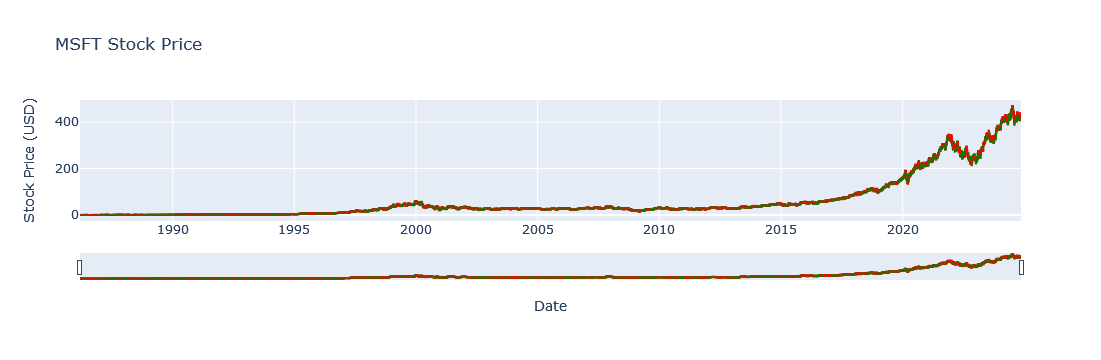

In [171]:

fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'].values.flatten(),
    high=df['High'].values.flatten(),
    low=df['Low'].values.flatten(),
    close=df['Close'].values.flatten(),
    increasing=dict(line=dict(color='green')),  # Color for increasing (up) candles
    decreasing=dict(line=dict(color='red'))     # Color for decreasing (down) candles
)])

fig.update_layout(
    title='MSFT Stock Price',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    yaxis=dict(autorange=True)
)

fig.show()


## Export the data

### Microsoft data

#### Drop `Adj Close`

- To not confuse the `Close` and `Adj Close`

In [172]:
if 'Adj Close' in df.columns: df = df.drop(columns='Adj Close')
df.index = [d.strftime("%Y-%m-%d %H:%M:%S") for d in df.index]


In [173]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
1986-03-13 00:00:00,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14 00:00:00,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17 00:00:00,0.102431,0.103299,0.100694,0.100694,133171200
1986-03-18 00:00:00,0.099826,0.103299,0.098958,0.102431,67766400
1986-03-19 00:00:00,0.098090,0.100694,0.097222,0.099826,47894400


#### To Excel

- Create a folder called `data`

In [174]:
import os
os.makedirs("data", exist_ok=True)

df.to_excel("./data/microsoft-prices.xlsx")

#### To CSV

- Less size in memory

In [175]:
df.to_csv("./data/microsoft-prices.csv")

### Bitcoin data altogether (step by step)

#### Define ticker

In [176]:
ticker = 'MSFT'
ticker

'MSFT'

#### Download OLHVC

In [207]:
df_ticker = yf.download(ticker)
df_ticker.index = [d.strftime("%Y-%m-%d") for d in df_ticker.index]
df_ticker

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
2024-11-05,251.440002,251.440002,255.279999,246.210007,247.339996,69282500
2024-11-06,288.529999,288.529999,289.589996,275.619995,284.670013,165228700
2024-11-07,296.910004,296.910004,299.750000,285.519989,288.890015,117309200


#### Create file path

In [208]:
file_path = f'data/{ticker}.xlsx'
file_path

'data/TSLA.xlsx'

#### Export to Excel

In [209]:
df_ticker.to_excel(file_path)

#### Export to CSV

In [210]:
df_ticker.to_csv(f'data/{ticker}.csv')

#### Snippet

In [211]:
ticker = 'TSLA'
df_ticker = yf.download(ticker)
df_ticker.index = [d.strftime("%Y-%m-%d %H:%M:%S") for d in df_ticker.index]
df_ticker.to_excel(f'data/{ticker}.xlsx')
df_ticker.to_csv(f'data/{ticker}.csv')

[*********************100%***********************]  1 of 1 completed


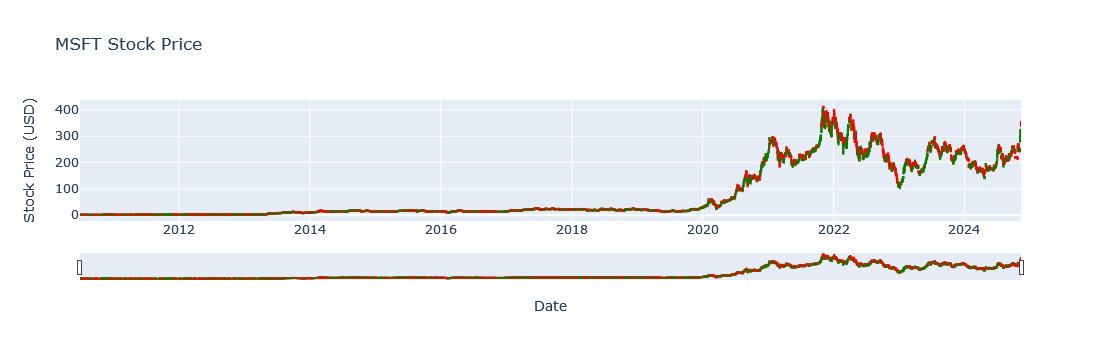

In [212]:
df = df_ticker
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'].values.flatten(),
    high=df['High'].values.flatten(),
    low=df['Low'].values.flatten(),
    close=df['Close'].values.flatten(),
    increasing=dict(line=dict(color='green')),  # Color for increasing (up) candles
    decreasing=dict(line=dict(color='red'))     # Color for decreasing (down) candles
)])

fig.update_layout(
    title='MSFT Stock Price',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    yaxis=dict(autorange=True)
)

fig.show()


## [ ] Data Preprocessing

In [213]:
???

Object `?` not found.


### Load the data

In [227]:
import pandas as pd

df_microsoft = pd.read_excel(
    'data/microsoft-prices.xlsx', index_col=0
)
df_microsoft

,Close,High,Low,Open,Volume
Price,,,,,
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
NaN,NaN,NaN,NaN,NaN,NaN
1986-03-13 00:00:00,0.097222,0.101563,0.088542,0.088542,1031788800
1986-03-14 00:00:00,0.100694,0.102431,0.097222,0.097222,308160000
1986-03-17 00:00:00,0.102431,0.103299,0.100694,0.100694,133171200
...,...,...,...,...,...
2024-11-05 00:00:00,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06 00:00:00,420.179993,420.450012,410.519989,412.420013,26681800
2024-11-07 00:00:00,425.429993,426.850006,419.880005,421.279999,19901800


### Filter the data

![](src/Microsoft_x_LinkedIn.png)

In [229]:
df_microsoft_linkedin = df_microsoft.loc["2016-12-01 00:00:00":,:].copy()
df_microsoft_linkedin

,Close,High,Low,Open,Volume
Price,,,,,
2016-12-01 00:00:00,59.200001,60.150002,58.939999,60.110001,34542100
2016-12-02 00:00:00,59.25,59.470001,58.799999,59.080002,25515700
2016-12-05 00:00:00,60.220001,60.59,59.560001,59.700001,23552700
2016-12-06 00:00:00,59.950001,60.459999,59.799999,60.43,19907000
2016-12-07 00:00:00,61.369999,61.380001,59.799999,60.009998,30809000
...,...,...,...,...,...
2024-11-05 00:00:00,411.459991,414.899994,408.079987,408.369995,17626000
2024-11-06 00:00:00,420.179993,420.450012,410.519989,412.420013,26681800
2024-11-07 00:00:00,425.429993,426.850006,419.880005,421.279999,19901800


## Create new columns

### Tomorrow's percentage change

In [230]:
df_microsoft_linkedin['change_tomorrow']=df_microsoft_linkedin.Close.pct_change(-1)*-100
df_microsoft_linkedin = df_microsoft_linkedin.dropna().copy()
df_microsoft_linkedin


,Close,High,Low,Open,Volume,change_tomorrow
Price,,,,,,
2016-12-01 00:00:00,59.200001,60.150002,58.939999,60.110001,34542100,0.084387
2016-12-02 00:00:00,59.25,59.470001,58.799999,59.080002,25515700,1.610763
2016-12-05 00:00:00,60.220001,60.59,59.560001,59.700001,23552700,-0.450376
2016-12-06 00:00:00,59.950001,60.459999,59.799999,60.43,19907000,2.313831
2016-12-07 00:00:00,61.369999,61.380001,59.799999,60.009998,30809000,-0.590068
...,...,...,...,...,...,...
2024-11-04 00:00:00,408.459991,410.420013,405.570007,409.799988,19672300,0.729111
2024-11-05 00:00:00,411.459991,414.899994,408.079987,408.369995,17626000,2.075301
2024-11-06 00:00:00,420.179993,420.450012,410.519989,412.420013,26681800,1.234046


### Did the stock go up or down?

In [231]:
# df_microsoft_linkedin['up_or_down'] = df_microsoft_linkedin['change_tomorrow'].apply(lambda x: "UP" if x > 0 else "DOWN")

import numpy as np
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(df_microsoft_linkedin['change_tomorrow']>0, "UP", "DOWN")
df_microsoft_linkedin.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      1073
DOWN     925
Name: count, dtype: int64

<Axes: xlabel='Price'>

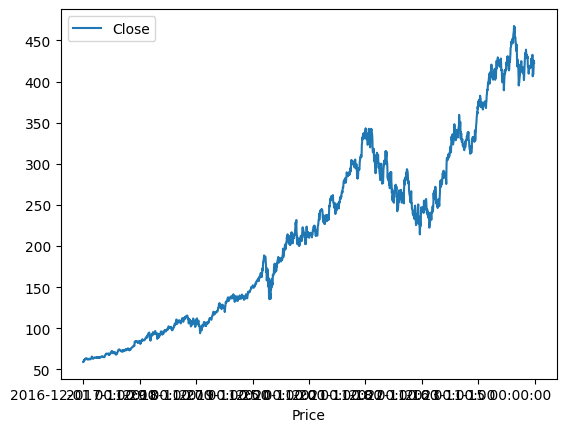

In [232]:
df_microsoft_linkedin[["Close"]].plot()

## Export preprocessed DataFrame into an Excel

## Experimenting with normalizing the columns

In [233]:
def normalize_column(column):
    try:
        max_val = column.max()
        min_val = column.min()
        abs_max = max(abs(max_val), abs(min_val))
        return column/abs_max
    except:
        return column


In [234]:
df_normalized = df_microsoft_linkedin.apply(normalize_column)

In [235]:
df_normalized

,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Price,,,,,,,
2016-12-01 00:00:00,0.126615,0.12843,0.1269,0.128715,0.310513,0.004882,UP
2016-12-02 00:00:00,0.126722,0.126978,0.126599,0.12651,0.229371,0.093178,UP
2016-12-05 00:00:00,0.128796,0.129369,0.128235,0.127837,0.211725,-0.026053,DOWN
2016-12-06 00:00:00,0.128219,0.129091,0.128752,0.1294,0.178952,0.133848,UP
2016-12-07 00:00:00,0.131256,0.131056,0.128752,0.128501,0.276954,-0.034134,DOWN
...,...,...,...,...,...,...,...
2024-11-04 00:00:00,0.873599,0.87631,0.873208,0.877516,0.176842,0.042177,UP
2024-11-05 00:00:00,0.880015,0.885876,0.878612,0.874454,0.158447,0.120050,UP
2024-11-06 00:00:00,0.898665,0.897726,0.883865,0.883126,0.239853,0.071386,UP


<Axes: xlabel='Price'>

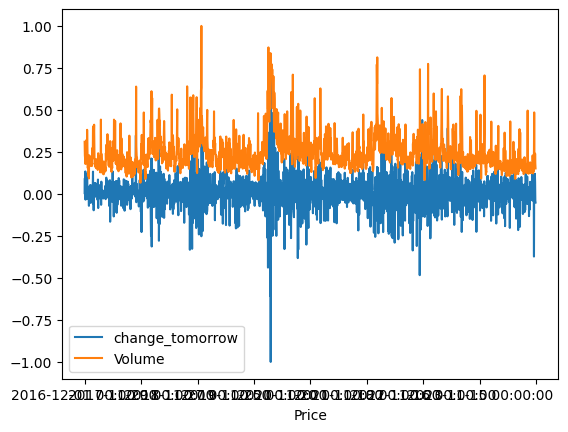

In [236]:
df_normalized[["change_tomorrow","Volume"]].plot()

In [237]:
df_microsoft_linkedin.to_excel("./data/microsoft-linkedin-processed.xlsx")
df_normalized.to_excel("./data/microsoft-linkedin-processed-normalized.xlsx")

<Axes: xlabel='Price'>

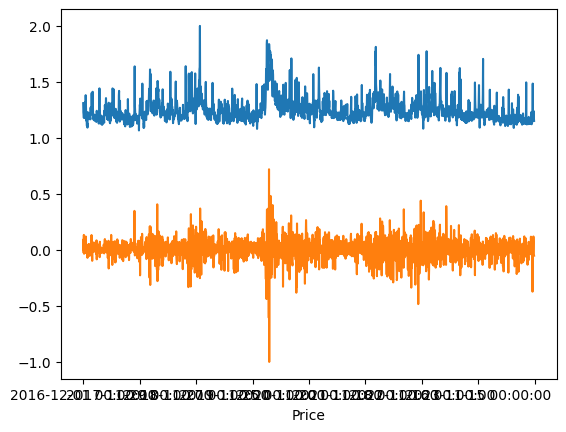

In [238]:
ax = df_normalized['Volume'].apply(lambda x:x+1) .plot(label='Volume')
df_normalized['change_tomorrow'].plot(ax=ax, label='Change')

